In [8]:
# import libraries
from music21 import *
from random import randint
from copy import deepcopy

In [14]:
# example
m1 = stream.Measure()
m1.append(note.Note('C5'))
part1 = [m1] * 8
m2 = stream.Measure()
m2.append(note.Note('A4'))
part2 = [m2] * 8
m3 = stream.Measure()
m3.append(note.Note('F4'))
part3 = [m3] * 8
# decompose each part into all their measures
parts = [
    part1,
    part2,
    part3
]

In [15]:
# generate sequence
# return a list with element of type (partIndex, numberOfMeasures)
def generateSequence(lenOfParts, numberOfParts, cycle, shift):
    # check arguments
    assert lenOfParts != None
    assert numberOfParts > 0
    assert cycle >= 0
    assert shift >= 0
    # initialize sequence and first part
    sequence = []
    curr = randint(0, numberOfParts - 1)
    # fill in sequence
    for i in range(cycle):
        sequence.append((curr, randint(
            max(lenOfParts[curr] - 1 - i - shift, 1), 
            max(lenOfParts[curr] - 1 - i, 1))))
        next = randint(0, numberOfParts - 1)
        while next == curr:
            next = randint(0, numberOfParts - 1)
        curr = next
    return sequence

In [16]:
def generateStream(parts, sequence):
    # check arguments
    assert parts != None
    assert sequence != None
    # initialize stream
    s = stream.Stream()
    # fill in stream
    for seq in sequence:
        for i in range(seq[1]):
            s.append(deepcopy(parts[seq[0]][i]))
    return s

In [17]:
# generate final stream
def generate(parts, cycle, shift):
    # check arguments
    assert parts != None
    assert cycle >= 0
    assert shift >= 0
    # get some values
    lenOfParts = [len(part) for part in parts]
    numberOfParts = len(parts)
    # generate sequence
    sequence = generateSequence(lenOfParts, numberOfParts, cycle, shift)
    # generate stream
    return generateStream(parts, sequence)
        

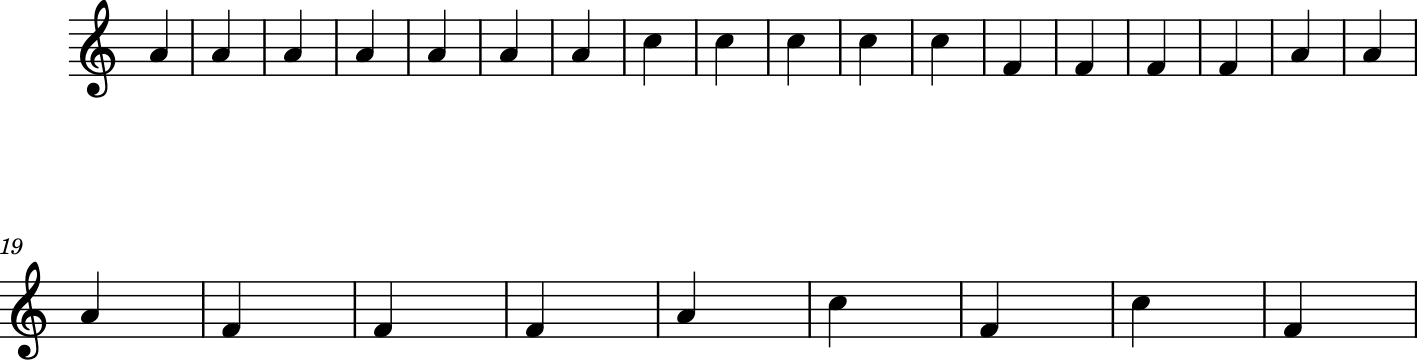

In [18]:
# define the number of transition
cycle = 10
# define the range of randomness for the generation of the number of measures
shift = 1
s = generate(parts, cycle, shift)
s.show()